#            Credit EDA Case Study

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Loading Application Data

In [4]:
#Reading the data from application_data csv
Appdata = pd.read_csv('application_data.csv')
Appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Checking Data Structure
Appdata.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
# Checking the number of rows and columns in the application_data dataframe
Appdata.shape

(307511, 122)

In [7]:
# summary for the numeric columns
Appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Quality Check: Inspecting , Cleaning and  Imputing data 

In [8]:
#Null Columns data from application_data file 
nullcolcheck=Appdata.isnull().sum()
nullcolcheck.sort_values(ascending = False)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [9]:
## Percentage of null values in each column
null_col_percent = Appdata.isnull().sum() * 100 / len(Appdata)
null_col_percent.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
## List of Columns where null / missing values are more than 35%
null_col=([null_col_percent[null_col_percent>35].index]) 
null_col 

[Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
        'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
        'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
        'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
        'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
        'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
        'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
        'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
        'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
        'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
        'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
        'NONLIVINGA

In [11]:
# Data Cleaning
# Removing the columns having percentage of null values > 35%
Appdata.drop(labels=null_col[0],axis=1,inplace=True)
nullcolcheck=Appdata.isnull().sum() 

In [12]:
# Percentage of null values in each column after droping columns
nullcol_percent = Appdata.isnull().sum() * 100 / len(Appdata) 
nullcol_percent.sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

### Checking Columns for Imputaion of data/Values where there are less missing values by  Best Metric to Impute in some columns. 

After Inspecting the application_data file we have selected following columns to check and impute data if required,
NAME_TYPE_SUITE
AMT_ANNUITY
AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_2
OCCUPATION_TYPE

In [13]:
#checking AMT_ANNUITY values
pd.value_counts(Appdata.AMT_ANNUITY)

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

<AxesSubplot:xlabel='AMT_ANNUITY'>

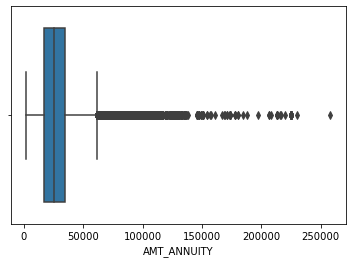

In [14]:
#plotting to decide imputation technique
sns.boxplot(Appdata.AMT_ANNUITY)

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

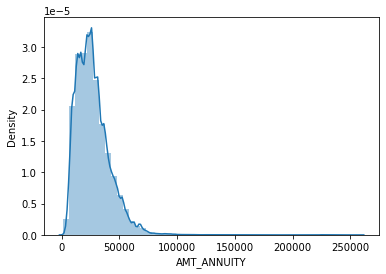

In [15]:
#distplot to see overall AMT_ANNUITY data
sns.distplot(Appdata.AMT_ANNUITY)

INFERENCE: From above distribution plot can observe that there are several high ANNUITY amounts.

We can see that AMT_ANNUITY data is skewed. As this column is having an many outliers it is inappropriate to fill those missing values with mean.Using mean value for replacing missing values may not create a great model and hence we can use Median imputing the data.

In [16]:
#Finding the median
Appdata.AMT_ANNUITY.median()

24903.0

INFERENCE we can impute the missing values for AMT_ANNUITY with the median which is 24903.0

In [17]:
#checking no. of columns missing in 'NAME_TYPE_SUITE' categorical column 
Appdata.NAME_TYPE_SUITE.isnull().sum()

1292

In [18]:
#checking for value for each category in the 'NAME_TYPE_SUITE' column
pd.value_counts(Appdata.NAME_TYPE_SUITE)


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

INFERENCE - For the above NAME_TYPE_SUITE categorical column above we can impute the missing value with 'Unaccompanied' category since it is the category with maximum value(that is the MODE of the above is Unaccompanied category) .Therefore it can be used to replace missing value which is 248526.

In [19]:
#chceking AMT_REQ_CREDIT_BUREAU_YEAR values
Appdata.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [20]:
Appdata.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [21]:
Appdata.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Density'>

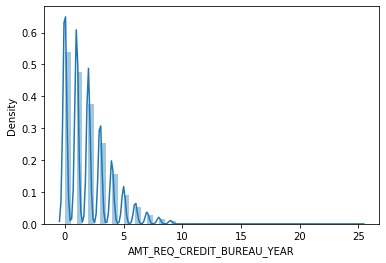

In [22]:
sns.distplot(Appdata.AMT_REQ_CREDIT_BUREAU_YEAR)

INFERENCE - For AMT_REQ_CREDIT_BUREAU_YEAR categorical column above we can impute the missing value with maximum value 0 Since they all are number of credit inquiries, replacing missing values with the most frequent value where 0 is the value for most number of events. which is the mode.

In [23]:
#cheking AMT_GOODS_PRICE values
Appdata.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [24]:
Appdata.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

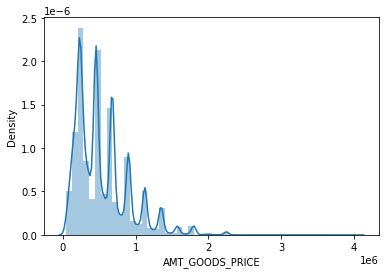

In [25]:
#plotting to decide imputation technique
sns.distplot(Appdata.AMT_GOODS_PRICE)

In [26]:
Appdata.AMT_GOODS_PRICE.median()

450000.0

INFERENCE - For AMT_GOODS_PRICE we can impute the missing value with maximum value most frequent value. which can be median .
we cannot impute mean as mean will be higher and inappropraite to give mean value in place of missing data.

In [27]:
#cheking EXT_SOURCE_2 values
Appdata.EXT_SOURCE_2.value_counts()                

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

<AxesSubplot:xlabel='EXT_SOURCE_2'>

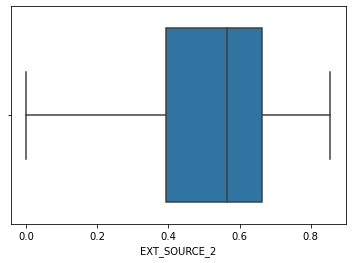

In [28]:
#plotting to decide imputation technique
sns.boxplot(Appdata.EXT_SOURCE_2)

In [29]:
Appdata.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

INFERENCE - For EXT_SOURCE_2 we can impute the missing value with mean or median because they are almost equal or we can remove the rows since there are less no. of missing values.

INFERENCE For Columns AMT_REQ_CREDIT_BUREAU_QRT ,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR .we can impute the missing value with maximum value 0 Similar to the column AMT_REQ_CREDIT_BUREAU_YEAR,  Since they all are number of credit inquiries, replacing missing values with the most frequent value 0 where 0 is the value for most number of events. which is the mode.

In [30]:
#cheking OCCUPATION_TYPE values
Appdata.OCCUPATION_TYPE.value_counts()    

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers

In [31]:
Appdata.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

### Checking Data Types

In [32]:
Appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [33]:
#number of days,number of enquiries,number of family members and number of people in social circle.
#Converting them from float to int type
Appdata['DAYS_REGISTRATION'] = Appdata['DAYS_REGISTRATION'].astype(int,errors='ignore')
Appdata['CNT_FAM_MEMBERS'] = Appdata['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
Appdata['OBS_30_CNT_SOCIAL_CIRCLE'] = Appdata['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
Appdata['DEF_30_CNT_SOCIAL_CIRCLE'] = Appdata['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
Appdata['DAYS_LAST_PHONE_CHANGE'] = Appdata['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
Appdata['AMT_REQ_CREDIT_BUREAU_HOUR'] = Appdata['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')

In [34]:
Appdata['AMT_INCOME_TOTAL'] = Appdata['AMT_INCOME_TOTAL'].astype(int,errors='ignore')

In [35]:
Appdata['AMT_INCOME_TOTAL'] = pd.to_numeric(Appdata['AMT_INCOME_TOTAL'], errors = 'coerce')

In [36]:
Appdata[["DAYS_REGISTRATION","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-3648,-9461,-637,-3648,-2120,-1134.0
1,-1186,-16765,-1188,-1186,-291,-828.0
2,-4260,-19046,-225,-4260,-2531,-815.0
3,-9833,-19005,-3039,-9833,-2437,-617.0
4,-4311,-19932,-3038,-4311,-3458,-1106.0
...,...,...,...,...,...,...
307506,-8456,-9327,-236,-8456,-1982,-273.0
307507,-4388,-20775,365243,-4388,-4090,0.0
307508,-6737,-14966,-7921,-6737,-5150,-1909.0
307509,-2562,-11961,-4786,-2562,-931,-322.0


In [37]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive value
filter_col = [col for col in Appdata if col.startswith('DAYS')]
filter_col
Appdata[filter_col]= abs(Appdata[filter_col])


In [38]:
Appdata[["DAYS_REGISTRATION","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,3648.0,9461.0,637.0,3648.0,2120.0,1134.0
1,1186.0,16765.0,1188.0,1186.0,291.0,828.0
2,4260.0,19046.0,225.0,4260.0,2531.0,815.0
3,9833.0,19005.0,3039.0,9833.0,2437.0,617.0
4,4311.0,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...,...
307506,8456.0,9327.0,236.0,8456.0,1982.0,273.0
307507,4388.0,20775.0,365243.0,4388.0,4090.0,0.0
307508,6737.0,14966.0,7921.0,6737.0,5150.0,1909.0
307509,2562.0,11961.0,4786.0,2562.0,931.0,322.0


### Outliers

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_INCOME_TOTAL'>

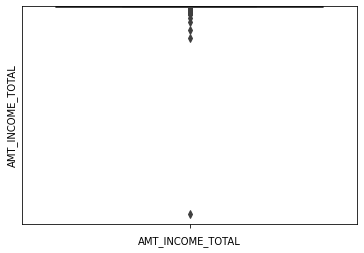

In [39]:
#plotting to decide imputation technique
sns.boxplot(Appdata.AMT_INCOME_TOTAL)
sns.boxplot( y = 'AMT_INCOME_TOTAL', data =Appdata)

INFERENCE For Variable AMT_INCOME_TOTAL which tells us the income of the client. We observe a value around 120M which is an outlier and many values fall below 10M.This basically tells us that people with lower income apply for loan.
The outlier are an exception specially the one near 120M .The reason for the person for applying for loan can be to expand/invest in his business or invest in a bigger property.We will just cap this outlier as income can be variable .

<AxesSubplot:title={'center':'Distribution of AMT_ANNUITY'}, ylabel='AMT_ANNUITY'>

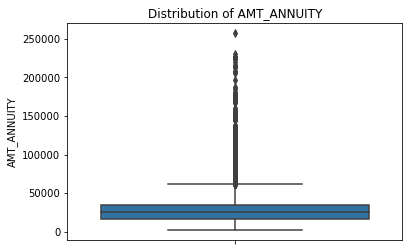

In [40]:
#Distribution of AMT_ANNUITY
plt.title("Distribution of AMT_ANNUITY")
sns.boxplot(y = 'AMT_ANNUITY', data =Appdata)

INFERENCE For Variable AMT_ANNUITY which is the loan Annuity amount. We observe a value at 260000  which is an outlier.There are outliers because people with different loan amount will have different loan annuity .We can handle these outliers by simpling binning them .

<AxesSubplot:title={'center':'Distribution of AMOUNT CREDIT'}, ylabel='AMT_CREDIT'>

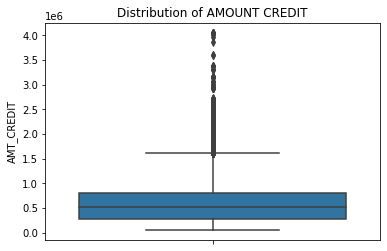

In [41]:
#Distribution of AMOUNT CREDIT
plt.title("Distribution of AMOUNT CREDIT")
sns.boxplot(y = 'AMT_CREDIT', data =Appdata)


<AxesSubplot:title={'center':'Distribution of DAYS_EMPLOYED'}, ylabel='DAYS_EMPLOYED'>

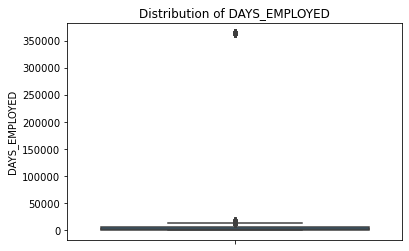

In [42]:
#Distribution of DAYS_EMPLOYED
plt.title("Distribution of DAYS_EMPLOYED")
sns.boxplot(y = 'DAYS_EMPLOYED', data =Appdata)

<AxesSubplot:title={'center':'Distribution of AMOUNT GOODS PRICE'}, ylabel='AMT_GOODS_PRICE'>

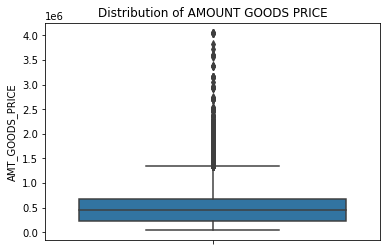

In [43]:
#Distribution of AMOUNT GOODS PRICE
plt.title("Distribution of AMOUNT GOODS PRICE")
sns.boxplot(y = 'AMT_GOODS_PRICE', data =Appdata)

INFERNECE

### Binning

In [44]:
INCOME_BINS = [0,20000,500000,100000000,10000000000]
slot = ['Low','Medium','High','Very High']

Appdata['AMT_INCOME_RANGE'] = pd.cut(Appdata['AMT_INCOME_TOTAL'], INCOME_BINS, labels=slot)
Appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium


In [45]:
credit_bins = [0,500000,1000000,5000000,10000000,500000000,1000000000]
slot = ['0-500k','500k-1M','1M-5M','5M-10M','10M-50M','50M-100M']

Appdata['CREDIT_RANGE']= pd.cut(Appdata['AMT_CREDIT'], credit_bins, labels=slot)
Appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,0-500k
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,1M-5M
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,0-500k
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0-500k
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,500k-1M


In [46]:
#Binning Age 
Appdata['DAYS_BIRTH'] = Appdata['DAYS_BIRTH']/365

In [47]:
Appdata['DAYS_BIRTH'] = Appdata['DAYS_BIRTH'].astype(int,errors='ignore')

In [48]:
Appdata.DAYS_BIRTH

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [49]:
#binning Age
AGE_BINS = [18,25,40,60,100]
slot2 = ['Younger','Young','Middle_Age','Senor-Citizen']

Appdata['AGE_Range'] = pd.cut(abs(Appdata['DAYS_BIRTH']), AGE_BINS, labels=slot2)
Appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,CREDIT_RANGE,AGE_Range
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,0-500k,Younger
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,1M-5M,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,0-500k,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0-500k,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,500k-1M,Middle_Age


## DATA IMBALANCE CHECK

In [51]:
#percentage of data imbalance
100*Appdata.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

INFERENCE:This shows there is data imbalance in the dataframe.People with payment difficulties is very less than other cases.

### Analysis

In [52]:
#Dividing the data set into data set i.e  target =1 and target = 0
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
target0 = Appdata.loc[Appdata["TARGET"]==0]
target1 = Appdata.loc[Appdata["TARGET"]==1]

In [53]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,CREDIT_RANGE,AGE_Range
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,1M-5M,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,0-500k,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0-500k,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,500k-1M,Middle_Age
5,100008,0,Cash loans,M,N,Y,0,99000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588.0,4970.0,477.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,0-500k,Middle_Age


In [54]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,CREDIT_RANGE,AGE_Range
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,0-500k,Younger
26,100031,1,Cash loans,F,N,Y,0,112500,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628.0,6573.0,1827.0,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Medium,500k-1M,Middle_Age
40,100047,1,Cash loans,M,N,Y,0,202500,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262.0,1182.0,1029.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Medium,1M-5M,Middle_Age
42,100049,1,Cash loans,F,N,N,0,135000,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597.0,45.0,4409.0,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Medium,0-500k,Young
81,100096,1,Cash loans,F,N,Y,0,81000,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243.0,5391.0,4199.0,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,0-500k,Senor-Citizen


### Univariate Analysis for Categorical variables

<AxesSubplot:title={'center':'Other Cases'}, xlabel='CODE_GENDER', ylabel='count'>

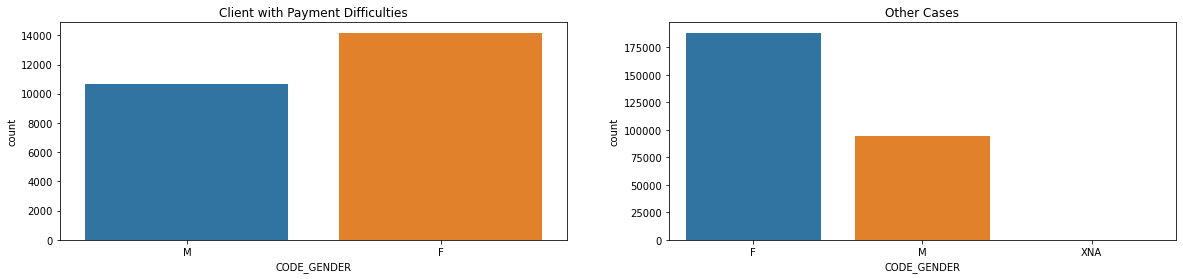

In [55]:
#univariate analysis for CODE_GENDER
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties')
sns.countplot(target1.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Other Cases')
sns.countplot(target0.CODE_GENDER)

INFERENCE:When we compare both the cases on base of gender we observe that female gender has majority in both the cases .As for male gender there are slightly more male in Othe Cases than Client with Payment difficulties.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Sales staff'),
  Text(2, 0, 'Core staff'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Accountants'),
  Text(7, 0, 'Medicine staff'),
  Text(8, 0, 'Security staff'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'Cleaning staff'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Low-skill Laborers'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Secretaries'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'HR staff'),
  Text(17, 0, 'IT staff')])

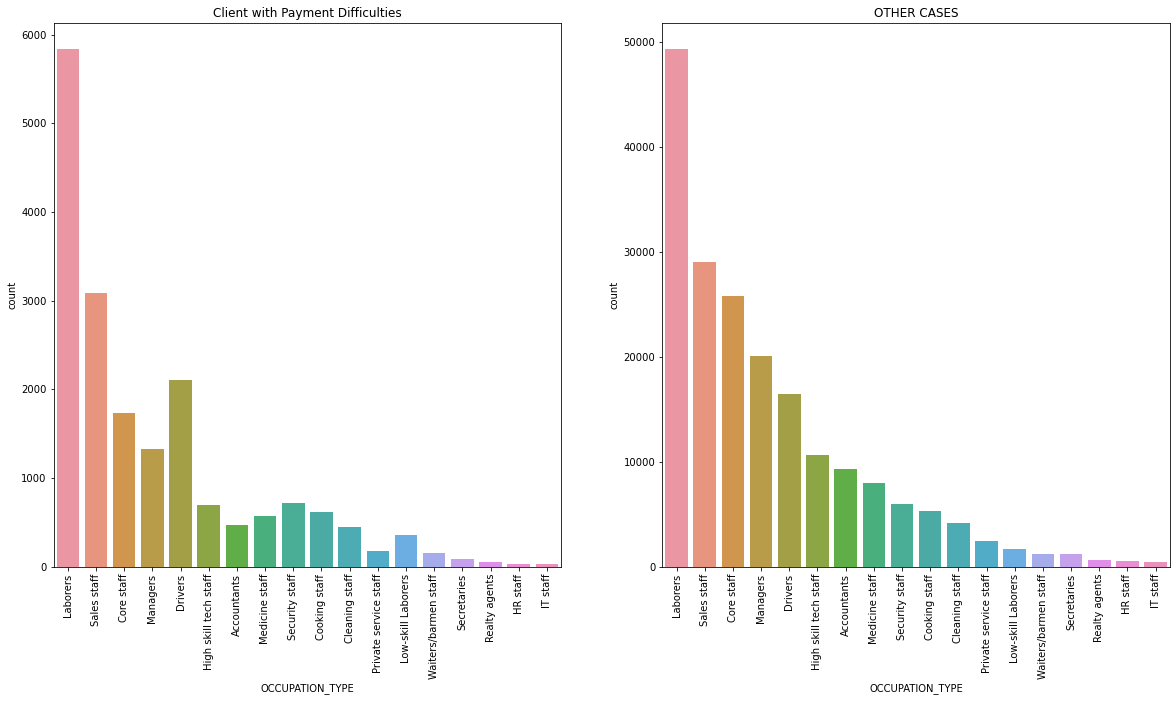

In [56]:
#univariate analysis for OCCUPATION_TYPE

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties')
plot=sns.countplot(target1.OCCUPATION_TYPE, order = Appdata['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('OTHER CASES')
plot=sns.countplot(target0.OCCUPATION_TYPE, order = Appdata['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
#sns.countplot('OCCUPATION_TYPE', data =Appdata, order = Appdata['OCCUPATION_TYPE'].value_counts().index)
#plot=sns.barplot(data=df,  x=" ", y=" ")
#plt.setp(plot.get_xticklabels(), rotation=90)

INFERENCE:We can see that Labourers are having most difficulty with payment and IT staff has the least difficulty.Similarly in other cases we can see that labourers are the one with maximum payment and IT staff with least this can be due to the fact that labourers apply more for loans.


### Univariate Analysis for Continuous Variables

<AxesSubplot:title={'center':'OTHER CASES'}, xlabel='DAYS_BIRTH', ylabel='Density'>

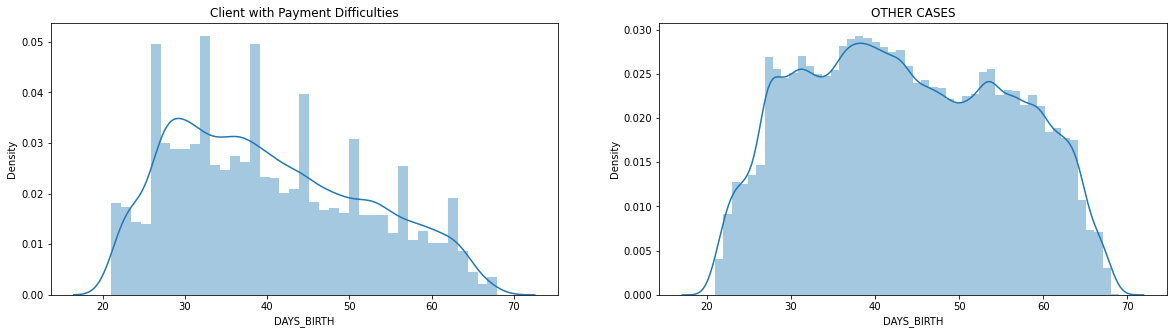

In [57]:
#Univariate Analysis DAYS_BIRTH

plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties')
sns.distplot(target1.DAYS_BIRTH)


plt.subplot(1,2,2)
plt.title('OTHER CASES')
sns.distplot(target0.DAYS_BIRTH)


INFERENCE:From first plot we see that the skewness is slight towards the left which means younger people have slightly more difficulty in payments.From the second plot we see there is significant difference in payment done by any age group.

<AxesSubplot:title={'center':'OTHER CASES'}, xlabel='AMT_CREDIT', ylabel='Density'>

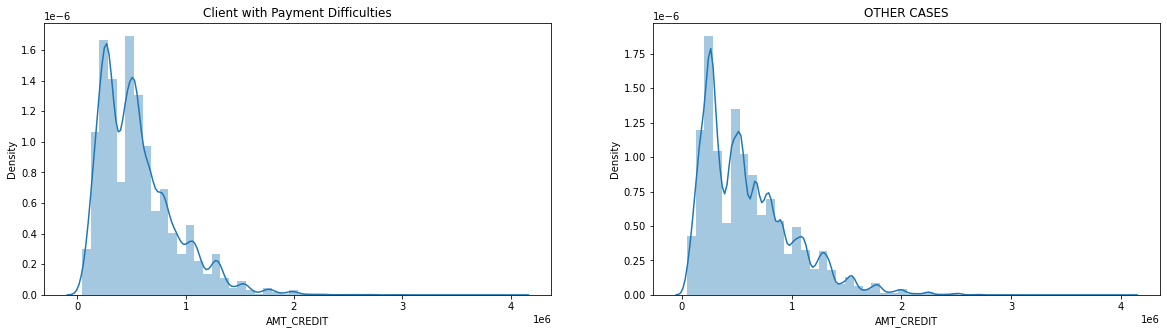

In [58]:
##Univariate Analysis AMT_CREDIT
plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties')
sns.distplot(target1.AMT_CREDIT)


plt.subplot(1,2,2)
plt.title('OTHER CASES')
sns.distplot(target0.AMT_CREDIT)

INFERENCE: From above plots we observe that payment difficulties and other cases have almost same amount credit more clustered towards the left side of the graph.

### Bivariate Analysis for categorical-continuous

<AxesSubplot:title={'center':'No Defaultees'}, xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_INCOME_TOTAL'>

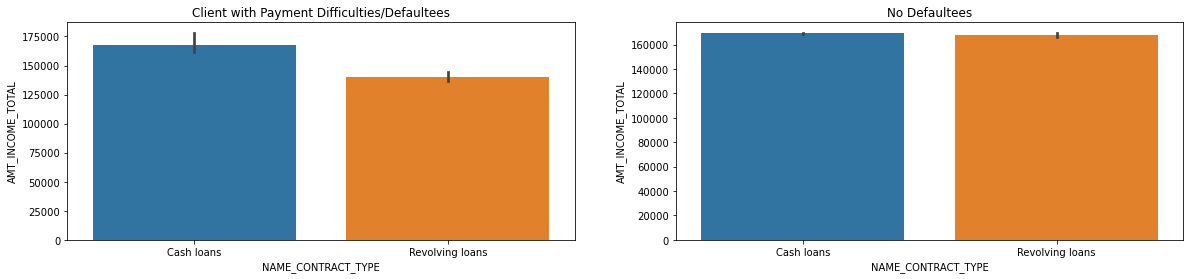

In [59]:
# Bivariate Analysis for NAME_CONTRACT_TYPE and AMT_INCOME_TOTAL

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties/Defaultees')
sns.barplot(x = 'NAME_CONTRACT_TYPE', y = 'AMT_INCOME_TOTAL', data =target1)

plt.subplot(1,2,2)
plt.title('No Defaultees')
sns.barplot(x = 'NAME_CONTRACT_TYPE', y = 'AMT_INCOME_TOTAL', data =target0)

INFERENCE:From 1st plot we see that client with cash loans have more income than clients with revolving loans in payment than client with revolving loans.

<AxesSubplot:title={'center':'Other Cases'}, xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

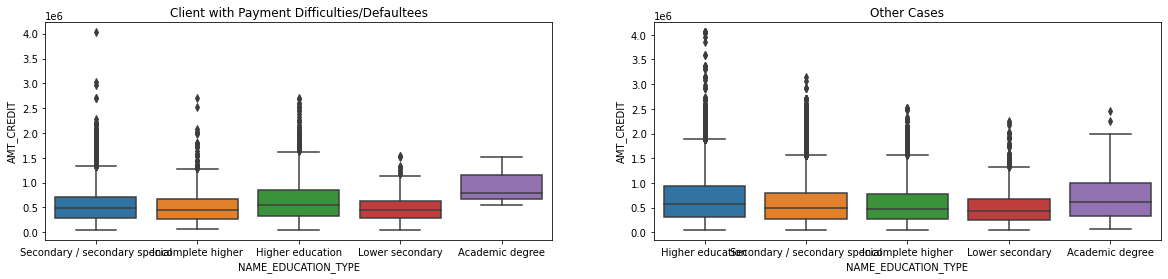

In [60]:
# NAME_CONTRACT_TYPE and AMT_INCOME_TOTAL

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties/Defaultees')
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =target1)

plt.subplot(1,2,2)
plt.title('Other Cases')
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =target0)

INFERENCE From above box plot we cam observe Clients with Highier education, Scondary Education have more Amount Credit than Lower Secondary Clients.
In 1st box plot for Payment Difficulties there are no outliers for Academic Degree but in 2nd Boxplot there are outliers. 

### Bivariate Analysis for categorical-categorical

<AxesSubplot:title={'center':'Other Cases'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

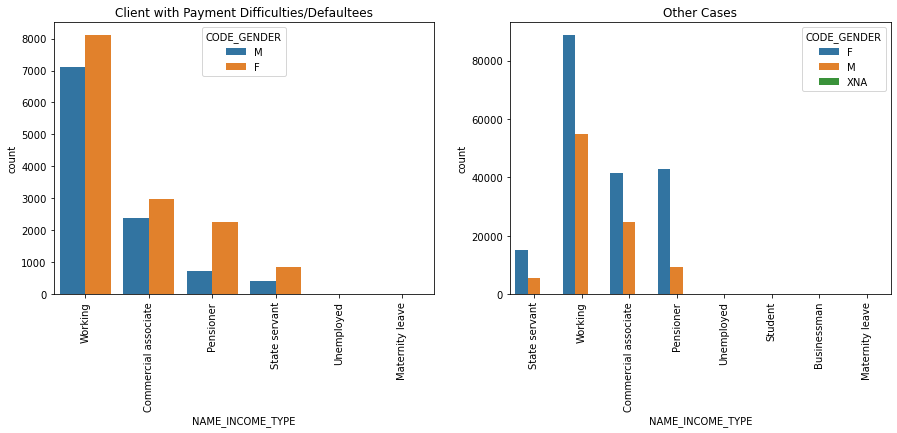

In [61]:
# Bivariate Analysis for NAME_INCOME_TYPE and CODE_GENDER

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties/Defaultees')
plt.xticks(rotation=90)
sns.countplot('NAME_INCOME_TYPE', hue = 'CODE_GENDER', data =target1)

plt.subplot(1,2,2)
plt.title('Other Cases')
plt.xticks(rotation=90)
sns.countplot( 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', data =target0)

INFERENCE 
1) We see that Gender with working class are havinh more difficulties in Paying the Loan.
2) Females are hiving more difficulting in paying the loag for all income types.

<AxesSubplot:title={'center':'Other Cases'}, xlabel='OCCUPATION_TYPE', ylabel='count'>

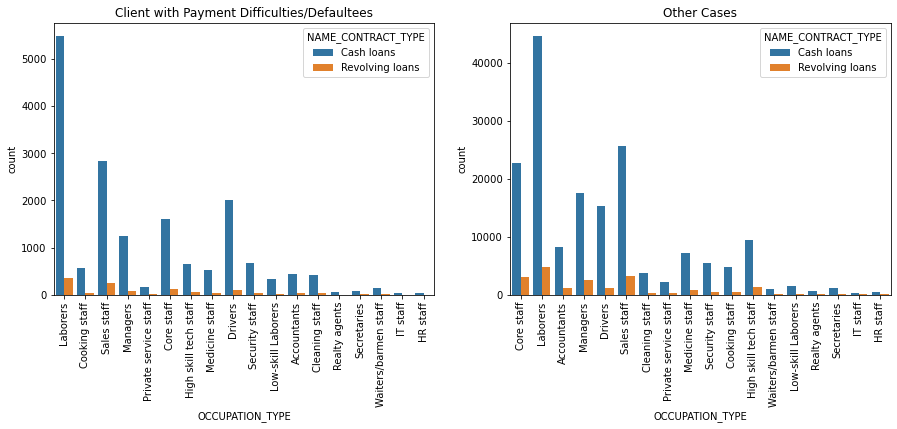

In [62]:
# Bivariate Analysis for OCCUPATION_TYPE and CODE_REJECT_REASON

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Client with Payment Difficulties/Defaultees')
plt.xticks(rotation=90)
sns.countplot('OCCUPATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data =target1)

plt.subplot(1,2,2)
plt.title('Other Cases')
plt.xticks(rotation=90)
sns.countplot( 'OCCUPATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data =target0)

INFERENCE From above we observe that in call occupation types having difficulties in paying the cash loan than revolving the loans.
Laborers are paying the Cash loans than reloving loans compared to other occupation types.

### Bivariate Continuous - Continuos Variables

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

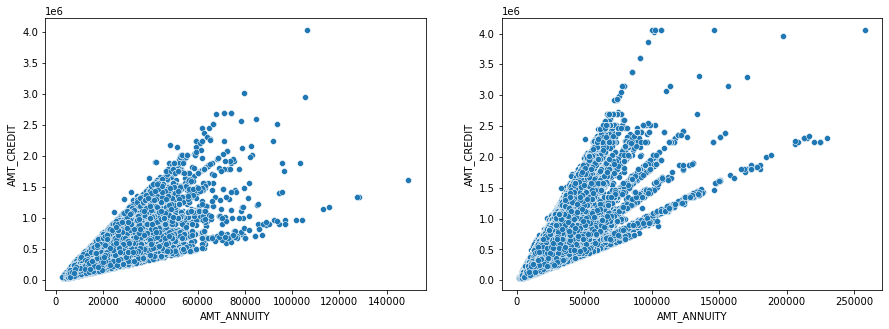

In [64]:
#Bivariate fro AMT_ANNUITY ,AMT_CREDIT variables
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'AMT_ANNUITY', y = 'AMT_CREDIT', data =target1)
plt.subplot(1,2,2)
sns.scatterplot(x = 'AMT_ANNUITY', y = 'AMT_CREDIT', data =target0)

INFERENCE We can see Liner relaionship between AMT_ANNUITY and AMT_CREDIT. If If AMT_CREDIT increases AMT_ANNUITY increases.

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='DAYS_BIRTH'>

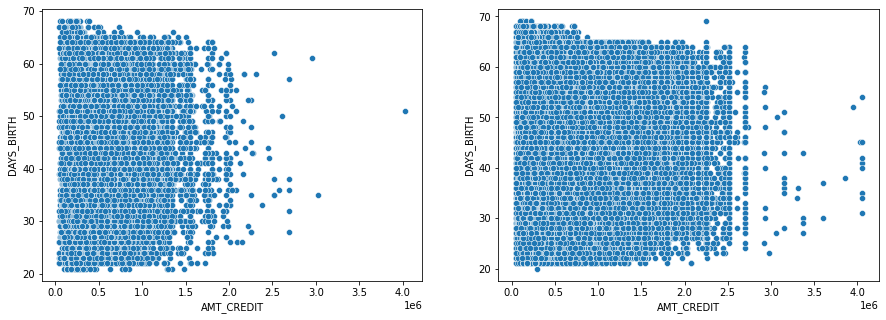

In [65]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'AMT_CREDIT', y = 'DAYS_BIRTH', data =target1)
plt.subplot(1,2,2)
sns.scatterplot(x = 'AMT_CREDIT', y = 'DAYS_BIRTH', data =target0)

INFERENCE From above plot we can tell Amount Credit is independent on Age of the client.

### Correlation

In [75]:
# listing all columns of Target 1 dataframe and identifying which are required for correlation analysis
list(target1.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [76]:
#creating new Dataframe for correlation purpose
newtarget1 = target1.copy()

In [77]:
newtarget1.drop(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
  'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','CNT_FAM_MEMBERS',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_INCOME_RANGE',
 'CREDIT_RANGE',
 'AGE_Range'], axis = 'columns', inplace = True)

In [78]:
newtarget1.shape

(24825, 10)

In [79]:
newtarget1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
0,0,202500,406597.5,24700.5,351000.0,25,637.0,3648.0,2120.0,10
26,0,112500,979992.0,27076.5,702000.0,51,2628.0,6573.0,1827.0,9
40,0,202500,1193580.0,35028.0,855000.0,47,1262.0,1182.0,1029.0,9
42,0,135000,288873.0,16258.5,238500.0,36,3597.0,45.0,4409.0,11
81,0,81000,252000.0,14593.5,252000.0,67,365243.0,5391.0,4199.0,10


In [80]:
newtarget1.corr().unstack().reset_index()

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,1.000000
1,CNT_CHILDREN,AMT_INCOME_TOTAL,0.004796
2,CNT_CHILDREN,AMT_CREDIT,-0.001675
3,CNT_CHILDREN,AMT_ANNUITY,0.031257
4,CNT_CHILDREN,AMT_GOODS_PRICE,-0.008112
5,CNT_CHILDREN,DAYS_BIRTH,-0.259222
6,CNT_CHILDREN,DAYS_EMPLOYED,-0.192864
7,CNT_CHILDREN,DAYS_REGISTRATION,-0.149154
8,CNT_CHILDREN,DAYS_ID_PUBLISH,0.032299
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,-0.023899


In [81]:
newtarget1.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.259222,-0.192864,-0.149154,0.032299,-0.023899
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,-0.003154,-0.014977,-0.000158,0.004215,0.013775
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.135070,0.001930,0.025854,0.052329,0.031782
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.014028,-0.081207,-0.034279,0.016767,0.031236
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.135603,0.006642,0.025679,0.056086,0.044315
DAYS_BIRTH,-0.259222,-0.003154,0.135070,0.014028,0.135603,1.000000,0.582441,0.289116,0.252256,-0.062205
DAYS_EMPLOYED,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.582441,1.000000,0.192455,0.229090,-0.060000
DAYS_REGISTRATION,-0.149154,-0.000158,0.025854,-0.034279,0.025679,0.289116,0.192455,1.000000,0.096833,0.032518
DAYS_ID_PUBLISH,0.032299,0.004215,0.052329,0.016767,0.056086,0.252256,0.229090,0.096833,1.000000,-0.021661
HOUR_APPR_PROCESS_START,-0.023899,0.013775,0.031782,0.031236,0.044315,-0.062205,-0.060000,0.032518,-0.021661,1.000000


In [82]:
corr1=newtarget1.corr()


In [83]:
corr1_df=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))

In [84]:
corr1_df = corr1_df.unstack().reset_index()
corr1_df

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,DAYS_BIRTH,NaN
6,CNT_CHILDREN,DAYS_EMPLOYED,NaN
7,CNT_CHILDREN,DAYS_REGISTRATION,NaN
8,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,NaN


In [85]:
corr1_df.columns = ['VAR1', 'VAR2', 'Correlation']

In [86]:
corr1_df

,VAR1,VAR2,Correlation
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,DAYS_BIRTH,NaN
6,CNT_CHILDREN,DAYS_EMPLOYED,NaN
7,CNT_CHILDREN,DAYS_REGISTRATION,NaN
8,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,NaN


In [87]:
corr1_df.dropna(subset = ['Correlation'], inplace =True)
corr1_df

,VAR1,VAR2,Correlation
10,AMT_INCOME_TOTAL,CNT_CHILDREN,0.004796
20,AMT_CREDIT,CNT_CHILDREN,-0.001675
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
30,AMT_ANNUITY,CNT_CHILDREN,0.031257
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
32,AMT_ANNUITY,AMT_CREDIT,0.752195
40,AMT_GOODS_PRICE,CNT_CHILDREN,-0.008112
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037583
42,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699


In [88]:
corr1_df['Abs_Correlation'] = corr1_df['Correlation'].abs()
# Correlation sorted by High to Low
corr1_df.sort_values(by = 'Abs_Correlation', ascending = False)

,VAR1,VAR2,Correlation,Abs_Correlation
42,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
32,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
65,DAYS_EMPLOYED,DAYS_BIRTH,0.582441,0.582441
75,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
50,DAYS_BIRTH,CNT_CHILDREN,-0.259222,0.259222
85,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
86,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
60,DAYS_EMPLOYED,CNT_CHILDREN,-0.192864,0.192864
76,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455


In [89]:
# listing all columns of Target 0 dataframe and identifying which are required for correlation analysis
list(target0.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [90]:
newtarget0 = target0.copy()

In [91]:
newtarget0.drop(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
  'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','CNT_FAM_MEMBERS',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_INCOME_RANGE',
 'CREDIT_RANGE',
 'AGE_Range'], axis = 'columns', inplace = True)

In [92]:
newtarget0.shape

(282686, 10)

In [93]:
newtarget0.corr().unstack().reset_index()

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,1.000000
1,CNT_CHILDREN,AMT_INCOME_TOTAL,0.027397
2,CNT_CHILDREN,AMT_CREDIT,0.003081
3,CNT_CHILDREN,AMT_ANNUITY,0.020905
4,CNT_CHILDREN,AMT_GOODS_PRICE,-0.000525
5,CNT_CHILDREN,DAYS_BIRTH,-0.336907
6,CNT_CHILDREN,DAYS_EMPLOYED,-0.245174
7,CNT_CHILDREN,DAYS_REGISTRATION,-0.185792
8,CNT_CHILDREN,DAYS_ID_PUBLISH,0.028751
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,-0.005244


In [94]:
newtarget0.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.336907,-0.245174,-0.185792,0.028751,-0.005244
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,-0.062494,-0.140392,-0.064937,-0.022896,0.076743
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.047366,-0.070104,-0.013477,0.001464,0.053619
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,-0.012254,-0.104978,-0.039436,-0.014113,0.053589
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.044552,-0.068609,-0.015916,0.003649,0.062766
DAYS_BIRTH,-0.336907,-0.062494,0.047366,-0.012254,0.044552,1.000000,0.626028,0.333025,0.270804,-0.095784
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,0.626028,1.000000,0.214511,0.276663,-0.095455
DAYS_REGISTRATION,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.333025,0.214511,1.000000,0.100236,0.008044
DAYS_ID_PUBLISH,0.028751,-0.022896,0.001464,-0.014113,0.003649,0.270804,0.276663,0.100236,1.000000,-0.033980
HOUR_APPR_PROCESS_START,-0.005244,0.076743,0.053619,0.053589,0.062766,-0.095784,-0.095455,0.008044,-0.033980,1.000000


In [95]:
corr0 = newtarget0.corr()
corr0_df = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))

In [96]:
corr0_df = corr0_df.unstack().reset_index()
corr0_df

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,DAYS_BIRTH,NaN
6,CNT_CHILDREN,DAYS_EMPLOYED,NaN
7,CNT_CHILDREN,DAYS_REGISTRATION,NaN
8,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,NaN


In [97]:
corr0_df.columns = ['VAR1', 'VAR2', 'Correlation']

In [98]:
corr0_df

,VAR1,VAR2,Correlation
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,DAYS_BIRTH,NaN
6,CNT_CHILDREN,DAYS_EMPLOYED,NaN
7,CNT_CHILDREN,DAYS_REGISTRATION,NaN
8,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN
9,CNT_CHILDREN,HOUR_APPR_PROCESS_START,NaN


In [99]:
corr0_df.dropna(subset = ['Correlation'], inplace =True)
corr0_df

,VAR1,VAR2,Correlation
10,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
20,AMT_CREDIT,CNT_CHILDREN,0.003081
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
30,AMT_ANNUITY,CNT_CHILDREN,0.020905
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
32,AMT_ANNUITY,AMT_CREDIT,0.771309
40,AMT_GOODS_PRICE,CNT_CHILDREN,-0.000525
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
42,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686


In [100]:
corr0_df['Abs_Correlation'] = corr0_df['Correlation'].abs()
# Correlation sorted by High to Low
corr0_df.sort_values(by = 'Abs_Correlation', ascending = False)

,VAR1,VAR2,Correlation,Abs_Correlation
42,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
32,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
65,DAYS_EMPLOYED,DAYS_BIRTH,0.626028,0.626028
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
50,DAYS_BIRTH,CNT_CHILDREN,-0.336907,0.336907
75,DAYS_REGISTRATION,DAYS_BIRTH,0.333025,0.333025
86,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663


In [101]:
corr1_df.sort_values(by = 'Abs_Correlation', ascending = False)

,VAR1,VAR2,Correlation,Abs_Correlation
42,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
32,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
65,DAYS_EMPLOYED,DAYS_BIRTH,0.582441,0.582441
75,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
50,DAYS_BIRTH,CNT_CHILDREN,-0.259222,0.259222
85,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
86,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
60,DAYS_EMPLOYED,CNT_CHILDREN,-0.192864,0.192864
76,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455


INFERENCES: From Observation the top three Correlation variables for target variable 1 client with payment difficulties are
    1. AMT_GOODS_PRICE , AMT_CREDIT
    2. AMT_GOODS_PRICE , AMT_ANNUITY
    3. AMT_ANNUITY ,AMT_CREDIT
    

### Analysis on previous_application data

In [105]:
# loading data
Prevdata = pd.read_csv("previous_application.csv")
Prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
Prevdata.shape

(1670214, 37)

In [106]:
Prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [107]:
#percentage of null values in columns
nullcolpercent = Prevdata.isnull().sum().sort_values(ascending=False) * 100 / len(Prevdata)
nullcolpercent

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [110]:
#list of columns with null percent more than 35%
nullcol1=([nullcolpercent[nullcolpercent>35].index])
nullcol1

[Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
        'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE',
        'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING',
        'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE'],
       dtype='object')]

In [111]:
#droping columns which have null values more than 35%
Prevdata.drop(labels=nullcol1[0],axis=1,inplace=True)

In [112]:
#percentage of null values in columns
nullcolcheck1=Prevdata.isnull().sum().sort_values(ascending=False)* 100 / len(Prevdata)
nullcolcheck1

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [113]:
Prevdata.shape

(1670214, 26)

In [114]:
Prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### merging application data nad previous data 

In [115]:
#checking missing/value counts for NAME_CASH_LOAN_PURPOSE
pd.value_counts(Prevdata.NAME_CASH_LOAN_PURPOSE)

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [116]:
# removing rows which has XNA , XAO to reduce the data for analysis and as there will no impact to analysis by neglecting these.
Prevdata=Prevdata.drop(Prevdata[Prevdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Prevdata=Prevdata.drop(Prevdata[Prevdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [117]:
pd.value_counts(Prevdata.NAME_CASH_LOAN_PURPOSE)

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [118]:
# for CODE_REJECT_REASON replacing XAP with nan values as XAP doent give much information
Prevdata.CODE_REJECT_REASON.replace("XAP", np.nan)

4             HC
5            NaN
19            HC
51           NaN
85         SCOFR
           ...  
1670056      NaN
1670167      NaN
1670185    LIMIT
1670189      NaN
1670206      NaN
Name: CODE_REJECT_REASON, Length: 69635, dtype: object

In [119]:
#checking null percentage
nullcolcheck1=Prevdata.isnull().sum().sort_values(ascending=False)* 100 / len(Prevdata)
nullcolcheck1

CNT_PAYMENT                    0.377684
AMT_ANNUITY                    0.377684
PRODUCT_COMBINATION            0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_YIELD_GROUP               0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  int64   
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Merging data sets with SK_ID_CURR

In [120]:
combine_df=pd.merge(Appdata,Prevdata,on='SK_ID_CURR')

In [121]:
combine_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,CREDIT_RANGE,AGE_Range,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28,1010.0,4799.0,3015.0,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0-500k,Young,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41,2668.0,5266.0,3787.0,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,500k-1M,Middle_Age,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32,2060.0,3557.0,3557.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,500k-1M,Young,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44,1761.0,8236.0,4292.0,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,540.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,Medium

In [122]:
#checking null percentage
nullcolcheck2=combine_df.isnull().sum().sort_values(ascending=False)* 100 / len(combine_df)
nullcolcheck2

OCCUPATION_TYPE                 27.280225
EXT_SOURCE_3                    16.434114
AMT_REQ_CREDIT_BUREAU_WEEK      11.046404
AMT_REQ_CREDIT_BUREAU_MON       11.046404
AMT_REQ_CREDIT_BUREAU_QRT       11.046404
AMT_REQ_CREDIT_BUREAU_YEAR      11.046404
AMT_REQ_CREDIT_BUREAU_HOUR      11.046404
AMT_REQ_CREDIT_BUREAU_DAY       11.046404
CNT_PAYMENT                      0.393853
AMT_ANNUITY_y                    0.393853
NAME_TYPE_SUITE                  0.328211
DEF_60_CNT_SOCIAL_CIRCLE         0.144749
OBS_60_CNT_SOCIAL_CIRCLE         0.144749
DEF_30_CNT_SOCIAL_CIRCLE         0.144749
OBS_30_CNT_SOCIAL_CIRCLE         0.144749
EXT_SOURCE_2                     0.112770
AMT_GOODS_PRICE_x                0.099305
AMT_ANNUITY_x                    0.011782
REG_CITY_NOT_WORK_CITY           0.000000
ORGANIZATION_TYPE                0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
REG_CITY_NOT_LIVE_CITY           0

### Analysis

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

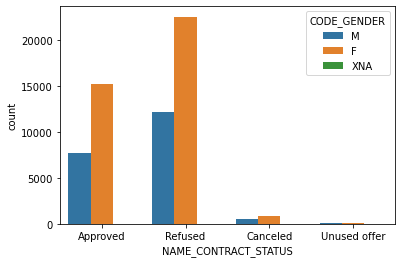

In [266]:

sns.countplot('NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=combine_df)


INFERENCE: 1) Female loans are more than Male.
2) Female Loans are rejected and Canceled more then Male.
3) Although Female loans are rejected is more number of Approved loans is higher for Female.

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

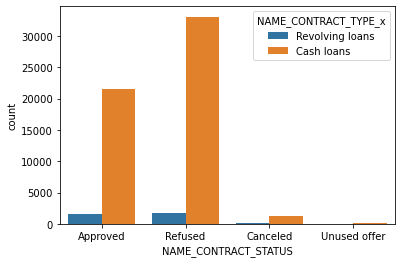

In [159]:
#countplot for NAME_CONTRACT_TYPE_y from previous data
sns.countplot('NAME_CONTRACT_STATUS',hue='NAME_CONTRACT_TYPE_x',data=combine_df)

INFERENCES From previous data observation we can tell Cash loans are refused is higher than revolving loans.
Cash loans are refused generally then Revolving loans.

<AxesSubplot:xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

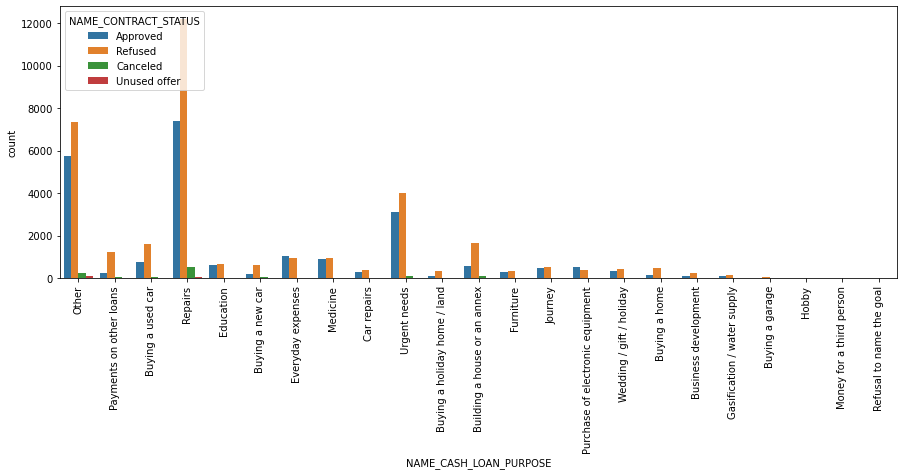

In [124]:
#count plot for categorical
plt.figure(figsize = (15,5))
plt.xticks(rotation=90)
sns.countplot('NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',data=combine_df)


INFERENCES 1) loans for Repair purposes are refused , cancelled many times.
2) There are high approvals for "Purchase of electronic shipments" than rejections.
3) There are high approvals for "Everyday Expences" than rejections.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='NAME_CASH_LOAN_PURPOSE'>

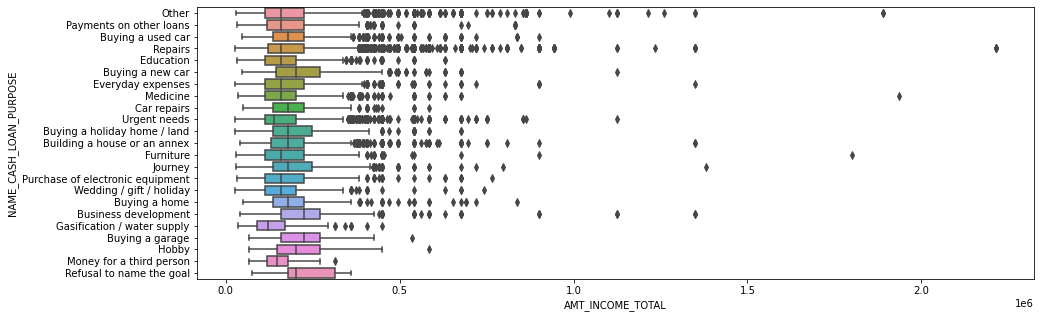

In [279]:
#Box Plot for AMT_INCOME_TOTAL and NAME_CASH_LOAN_PURPOSE
plt.figure(figsize = (15,5))
sns.boxplot(x='AMT_INCOME_TOTAL',y='NAME_CASH_LOAN_PURPOSE',data=combine_df)


INFERENCES 
1) Higher in income for people choose for Buying new car.
2) Similarly If amount Income is high Cash loans are high for Business Development.

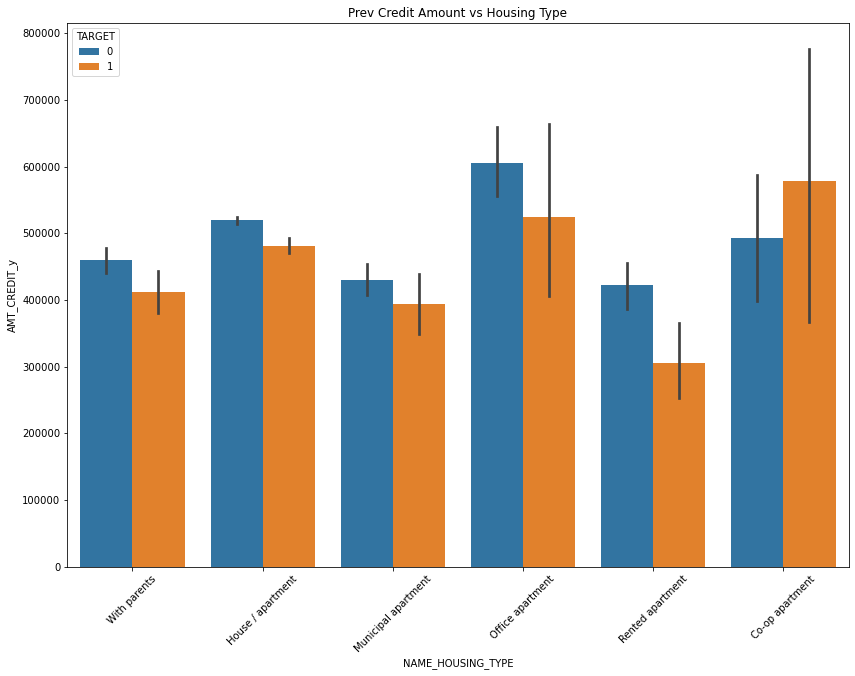

In [128]:
# Bar Plot for Multiple Variables for Previous Amt Credit data
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.barplot(data =combine_df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit Amount vs Housing Type')
plt.show()

INFERENCE: 1) For Housing type Office Appartment is having higher Credit for target 0 where as for Co-op Appartment there is higher payment difficulties.
2) For Rented Appartment the payment difficulties are less.

Bank should avoid giving loans for Co-op Appartment Housing Type and can give more loans for Rented Appartment, With parents, House / Appartment ae there are safer.


<AxesSubplot:xlabel='NAME_PAYMENT_TYPE', ylabel='count'>

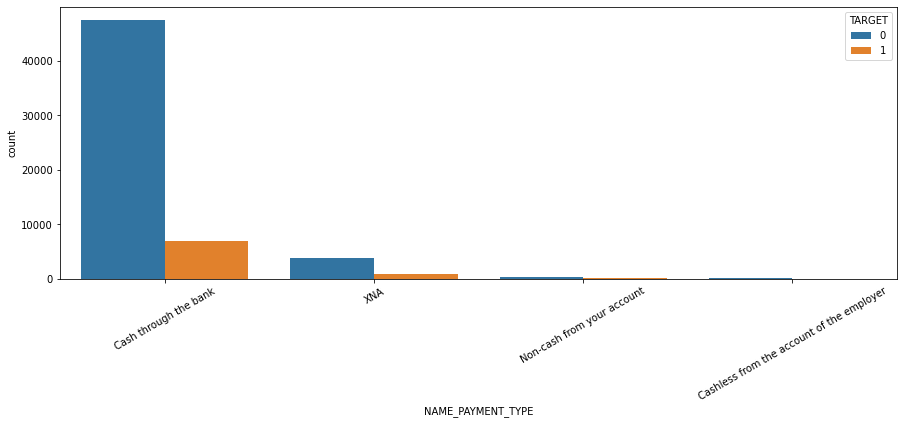

In [156]:
# Bar Plot for Multiple Variables for Previous Amt Credit data NAME_PAYMENT_TYPE NAME_CLIENT_TYPE
#count plot for categorical
plt.figure(figsize = (15,5))
plt.xticks(rotation=30)
sns.countplot('NAME_PAYMENT_TYPE',hue='TARGET',data=combine_df)


INFERENCE Cash through bank is preferred for payment type in both Target1 and Target0 case.

### Conclusion

1) 1) For Housing type Office Appartment is having higher Credit for target 0 where as for Co-op Appartment there is higher payment difficulties. 2) For Rented Appartment the payment difficulties are less.
Bank should avoid giving loans for Co-op Appartment Housing Type and can give more loans for Rented Appartment, With parents, House / Appartment ae there are safer.

2) Banks should Encourage more Cash Loans.

3) 